# Machine Learning Engineer Nanodegree

## Capstone Project

Adriano Falsarella Monte

## Course Mentor

Fernando Marcos Wittmann

## Definition

[comment]: # (_approx. 1-2 pages_)

### Project Overview

[comment]: # (In this section, look to provide a high-level overview of the project in layman’s terms. Questions to ask yourself when writing this section:)

[comment]: # (Has an overview of the project been provided, such as the problem domain, project origin, and related datasets or input data?)
[comment]: # (Has enough background information been given so that an uninformed reader would understand the problem domain and following problem statement?)

What is a fair offer to place when selling or buying a home? How to efficiently come to that fair price? The real estate area has been adopting machine learning to analyse historical data with several criterias to find a well balanced model to help predicting house prices.

After talking to Loft's CTO in a local event at Sao Paulo - Brazil, I've found out that [Loft uses machine learning to predict the house prices](https://blog.loft.com.br/entenda-como-a-loft-chega-no-valor-de-um-apartamento/) in their business, and data science is one of their core values. In order to exercise house prices predictions, let's use the [Kaggle's House Prices' getting started competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) public dataset, which provides an appropriate input for this project.

To predict a house price, a model should be trained with historical containing the houses features and their corresponding house sold price. Despite that the houses in Ames - Iowa are different from the houses here in Brazil, the [dataset provided in Kaggle's House Prices' competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) still gets the essence of the work that would be done if the data was from a different location since most of the features would also be applicable in different contexts.

### Problem Statement

[comment]: # (In this section, you will want to clearly define the problem that you are trying to solve, including the strategy {outline of tasks} you will use to achieve the desired solution. You should also thoroughly discuss what the intended solution will be for this problem. Questions to ask yourself when writing this section:)

[comment]: # (Is the problem statement clearly defined? Will the reader understand what you are expecting to solve?)
[comment]: # (Have you thoroughly discussed how you will attempt to solve the problem?)
[comment]: # (Is an anticipated solution clearly defined? Will the reader understand what results you are looking for?)

Given a dataset publicly available at [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) of homes in Ames - Iowa, having 79 house features, and containing 1460 entry points for training and 1459 entry points for testing, build the best model to predict house sale prices. A great model will predict the house prices as closest as possible to its actual labelled price.

In the conversation I had with Loft's CTO, he told me that with the house's dataset, they make some clusters, and for each cluster they apply a separate regression. I love how it embraces both unsupervised and supervised learning to get a refined result, so the idea is to try it out, exercising both concepts in this Capstone Project.

After clustering the data, find the best regression model for each cluster. With the trained models, to make a prediction, we need to first predict which cluster it is better represented, and then use that cluster's trained regression model to predict the house price.

### Metrics

[comment]: # (In this section, you will need to clearly define the metrics or calculations you will use to measure performance of a model or result in your project. These calculations and metrics should be justified based on the characteristics of the problem and problem domain. Questions to ask yourself when writing this section:)

[comment]: # (Are the metrics you’ve chosen to measure the performance of your models clearly discussed and defined?)
[comment]: # (Have you thoroughly discussed how you will attempt to solve the problem?)
[comment]: # (Have you provided reasonable justification for the metrics chosen based on the problem and solution?)

There are many evaluation methods available in scikit learn in the [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) package. As per the proposed solution, we'll have to take one [clustering metric](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) and at one [regression metric](https://scikit-learn.org/stable/modules/classes.html#regression-metrics).

For the clustering part, the project uses the silhouette score as the metric to find the best number of clusters, since it's the one that we've used most in the course. This evaluation method is provided by scikit learn in [`sklearn.metrics.silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) module.

For the regression part, the project uses the root mean squared log error ([RMSLE](http://mkhalusova.github.io/blog/2019/04/17/ml-model-evaluation-metrics-p3#rmsle)) as the metric to find the best regression model, since it's the metric that is used as [evaluation](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) in the Kaggle competition in the [Leaderboard ranking](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard), but mainly because the squared error is aligned with the business objectives (we should predict prices with the least error possible between the prediction and the actual price). This evaluation method is also provided by scikit learn in [`sklearn.metrics.mean_squared_log_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html) module.

To make all these measurements and processes replicable, the project always set a constant `random_state` when applicable. Also, a fixed and public dataset was chosen, [provided at Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), and with a mirror in this [Project's repository](https://github.com/adrifmonte/house-prices) for both [train](https://github.com/adrifmonte/house-prices/blob/master/data/train.csv) and [test](https://github.com/adrifmonte/house-prices/blob/master/data/test.csv) data.

## Analysis

[comment]: # (_approx. 2-4 pages_)

### Data Exploration

[comment]: # (In this section, you will be expected to analyze the data you are using for the problem. This data can either be in the form of a dataset {or datasets}, input data {or input files}, or even an environment. The type of data should be thoroughly described and, if possible, have basic statistics and information presented {such as discussion of input features or defining characteristics about the input or environment}. Any abnormalities or interesting qualities about the data that may need to be addressed have been identified {such as features that need to be transformed or the possibility of outliers}. Questions to ask yourself when writing this section:)

[comment]: # (If a dataset is present for this problem, have you thoroughly discussed certain features about the dataset? Has a data sample been provided to the reader?)
[comment]: # (If a dataset is present for this problem, are statistics about the dataset calculated and reported? Have any relevant results from this calculation been discussed?)
[comment]: # (If a dataset is *not* present for this problem, has discussion been made about the input space or input data for your problem?)
[comment]: # (Are there any abnormalities or characteristics about the input space or dataset that need to be addressed? {categorical variables, missing values, outliers, etc.})

There's a [brief description of each feature at Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), as well as a [`txt` file with detailed data description, mirrored in this Project's repository](https://github.com/adrifmonte/house-prices/blob/master/data/data_description.txt) as well. Since there's lots of features, let me try to summarize them:

The dataset is very feature-detailed, providing several characteristics about the dataset's houses, such as: the sale price in dollars (the target variable), the date, type, and condition of the sale, the building class, the zoning class, the lot area in square feet, the street acccess type and road proximity, the property configuration, shape, and slope, neighborhood quality, dwelling type and style, the property's condition and material quality, the construction and remodeling date, infos about the property's roof, foundation, electrical system, exterior, masonry veneer, garage, pool, porch, deck, and basement, the property's heating, fireplace, and air conditioning quality, infos about the rooms like bathrooms, bedroom, and kitchen, and finally how functional the home is overall.

![Numerical and categorical data sample](images/categorical_and_numerical_data_close.png)

Lots of the features are numerical values, some of them are continuous like dollars, area, distance, and some of them are discrete like quantity, year, month.

One point of attention here is that `MSSubClass` number (for example) is just an identifier, as per the [dataset's author description](https://github.com/adrifmonte/house-prices/blob/master/data/data_description.txt), and should be transformed into categorical data.

There are also lots of categorical features, some of them are nominal like types, styles, and shapes, and they should be one-hot-encoded, but there are also some categorical values that are ordinal, that may be ordered and transformed into numberical values, like class, grades, quality. Some of them may have their values scaled.

One point of attention here is that some ordinal features such as `LandSlope` and `GarageFinish` (for example) are ordinal values, as per the [dataset's author description](https://github.com/adrifmonte/house-prices/blob/master/data/data_description.txt), and should be transformed into numerical data.

![Missing values analysis, and outliers analysis](images/missing_values_plus_outliers.png)

#### Missing values and outliers

The Missing values chart shows us, in addition to the `count` value in the description tables above, that some features have missing values which should be handled considering each own particularities and percentage of missing values.

After handling missing values, it was noticed some feature outliers (some of these features are transformed data). These outliers datapoints (see Feature outliers table) will influence the regression model in a bad way, and they should be dropped to avoid that. It was considered an outlier if the feature datapoint was beyond the edge quartiles, the same technique applied in the Clustering Project.

### Exploratory Visualization

[comment]: # (In this section, you will need to provide some form of visualization that summarizes or extracts a relevant characteristic or feature about the data. The visualization should adequately support the data being used. Discuss why this visualization was chosen and how it is relevant. Questions to ask yourself when writing this section:)

[comment]: # (Have you visualized a relevant characteristic or feature about the dataset or input data?)
[comment]: # (Is the visualization thoroughly analyzed and discussed?)
[comment]: # (If a plot is provided, are the axes, title, and datum clearly defined?)

One of the main selected features was the NeighborhoodMeanPrice, which was created by the mean SalePrice of each Neighborhood. Before starting the project, I asked my partner:

> What criterias do you think that best defines the price of a house?

And she said:

> Hmm... The house size, quality, and the neighborhood, I guess.

Well, that actually makes sense, and as expected, the Neighborhood indeed represents a lot of how much a house should be valued.

Note that before plotting, the dataset was sorted by its `SalePrice`, and the chart also followed with an ascending neighborhood sale price, with a few exceptions. Those exceptions are probably due to some outlier prices in some neighborhoods, but one thing is unquestionable: the neighborhood dictates a lot of the house prices.

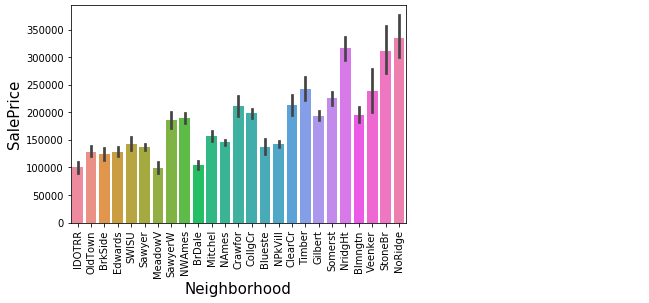

In [5]:
from IPython.display import Image
Image("images/neighborhood_wide.png")

### Algorithms and Techniques

[comment]: # (In this section, you will need to discuss the algorithms and techniques you intend to use for solving the problem. You should justify the use of each one based on the characteristics of the problem and the problem domain. Questions to ask yourself when writing this section:)

[comment]: # (Are the algorithms you will use, including any default variables/parameters in the project clearly defined?)
[comment]: # (Are the techniques to be used thoroughly discussed and justified?)
[comment]: # (Is it made clear how the input data or datasets will be handled by the algorithms and techniques chosen?)

- Data Processing Techniques

I intended to properly process data, and guarantee that no garbage is coming as input, so considerable effort by using different methods and techniques should be put to handling missing values <sup>[1](https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca),[2](https://www.analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/),[3](https://stats.stackexchange.com/a/391643/176988),[4](https://towardsdatascience.com/handling-missing-data-for-a-beginner-6d6f5ea53436),[5](http://www.statsmodels.org/dev/imputation.html),[6](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4#cbda)</sup> (dropping features, mean imputation, mode imputation, new type imputation, fill with zero, imputation by deriving from other features), making type conversion <sup>[1](https://stackoverflow.com/q/41335718/1064325),[2](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4#bc9d),[3](https://www.datacamp.com/community/tutorials/categorical-data)
[4](https://pbpython.com/categorical-encoding.html),[5](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159),[6](https://pt.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv),[7](https://towardsdatascience.com/why-you-should-try-mean-encoding-17057262cd0),[8](https://www.datacamp.com/community/tutorials/encoding-methodologies)</sup> (type casting, mean encoding, one hot encoding, mapping values), handling outliers (dropping rows), aggregating features (sum, weighted sum, subtraction, age calculation, mean, division, weighted boosting), scaling features <sup>[1](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4#d078),[2](https://www.codecademy.com/articles/normalization),[3](https://machinelearningmastery.com/feature-selection-machine-learning-python/),[4](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)</sup> (log scaling, mean normalization, min-max scaling), [selecting features](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e) (problem relevance, feature variance, feature correlation, target correlation, feature importance).

- Clustering Algorithms and Techniques

Before clustering, I intended to perform a PCA transformation to avoid the [curse of dimensionality](https://stats.stackexchange.com/q/256172/176988) (and review the Clustering with different number of components).

In this moment I intended to try different clustering models with different algorithms (such as [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html), and [Random Forest](https://nishanthu.github.io/articles/ClusteringUsingRandomForest.html)), evaluating them with [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) to have a feeling on the performance of each algorithm (do that for each number of clusters in a reasonable range of values).

With the selected model and number of clusters through the [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), predict the cluster of each house in both train and test data.

- Regression Clustering Algorithms and Techniques

For each cluster found, I intended to train models with different algorithms ([Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html), [XGBoost Regressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor)) and benchmark each of them with [K-Fold cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) using [`mean_squared_log_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html) to measure and validate the performance of each algorithm, making sure that they generalize well.

Also perform hyperparameters grid search with both [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), and if applicable do some quick round of EDA and/or data processing, and rerun the benchmark with the changes in order to find the best model for each cluster. Reprocess everything after having inserted an additional 10% of noisy data to assert the robustness of the solution.

### Benchmark

[comment]: # (In this section, you will need to provide a clearly defined benchmark result or threshold for comparing across performances obtained by your solution. The reasoning behind the benchmark {in the case where it is not an established result} should be discussed. Questions to ask yourself when writing this section:)

[comment]: # (Has some result or value been provided that acts as a benchmark for measuring performance?)
[comment]: # (Is it clear how this result or value was obtained {whether by data or by hypothesis}?)

After handling all missing values, let's set a naive baseline.

- Naive Prediction (Simple Math)

A simple math Naive Predictor was built to have a minimum base benchmark to beat with a more sophisticated method. This naive prediction can be calculated by the Lot Area of the predicting house multiplied by the dataset's mean Sale Price per Lot Area square feet, which can be calculated dividing the dataset's mean Sale Price, by the dataset's mean Lot Area.

The Naive Predictor should be naïve, yet reasonable, and as previously described, it can be achieved with simple math, as exemplified in the following code:

```
naive_train_X = aligned_encoded_train_data.drop(columns=['Id', 'SalePrice'])
naive_train_y = aligned_encoded_train_data['SalePrice']

mean_sale_price_per_lot_area = naive_train_y.mean() / naive_train_X['LotArea'].mean()

def naive_fit(X, y):
    mean_sale_price_per_lot_area = y.mean() / X['LotArea'].mean()
    return mean_sale_price_per_lot_area

def naive_predict(X, mean_sale_price_per_lot_area):
    return X['LotArea'] * mean_sale_price_per_lot_area
```

This predictor was not only trained and tested with KFold but was also submitted to the Kaggle's competition to understand how it performs by itself:

|Train score|Test score|Kaggle score|
|---|---|---|
|0.5034265623764532|0.522732597478724||
|0.5299006769793394|0.5109719880215422|0.55909|

- Naive Prediction (Linear Regression)

In order to also use an algorithm in the naive prediction phase, a simple Linear Regression was made with all the features. It trained nicely, but was very overfitted: the test and Kaggle scores were very high:

|Train score|Test score|Kaggle score|
|---|---|---|
|0.12314555019521473|1.8408330078556492||
|0.13708035922180273|1.5926004067904753|1.38515|

It probably overfitted due to the curse of dimensionality: there were too many features! So, it was reasonable to give a chance of making a Linear Regression with one feature, `LotArea` - the same used in the "simple math" Naive Prediction. Let's see how it performed:

|Train score|Test score|Kaggle score|
|---|---|---|
|0.3633472894098743|0.3927671323761031||
|0.40727444683178804|0.3795332401680835|0.42035|

Nice, it didn't overfitted as the first try, and it scored better than the simple math predictor.

Let's use `~0.4` as the Naive Prediction score.

- Kaggle Competition

Analysing the [Kaggle's House Prices Leaderboard data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard), after removing some last mile submission outliers, I intended to have as the main benchmark to achieve a submitted score under `0.138`, and then under the first quartile of `0.120`.

## Methodology

[comment]: # (_approx. 3-5 pages_)

### Data Preprocessing

[comment]: # (In this section, all of your preprocessing steps will need to be clearly documented, if any were necessary. From the previous section, any of the abnormalities or characteristics that you identified about the dataset will be addressed and corrected here. Questions to ask yourself when writing this section:)

[comment]: # (If the algorithms chosen require preprocessing steps like feature selection or feature transformations, have they been properly documented?)
[comment]: # (Based on the Data Exploration section, if there were abnormalities or characteristics that needed to be addressed, have they been properly corrected?)
[comment]: # (If no preprocessing is needed, has it been made clear why?)

#### Handling missing values <sup>[1](https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca),[2](https://www.analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/),[3](https://stats.stackexchange.com/a/391643/176988),[4](https://towardsdatascience.com/handling-missing-data-for-a-beginner-6d6f5ea53436),[5](http://www.statsmodels.org/dev/imputation.html),[6](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4#cbda)</sup>

- Dropping columns

When there are too many missing data in a feature, it is reasonable to drop its corresponding column. It was done for `PoolQC`, `MiscFeature`, `Alley`, and `Fence` features.

- New type imputation

When there are some missing categorical data and they mean none or empty or other or no value, it is fine to create a new category to represent them, specially when they have their own importance when evaluating their correspondence with the target value. It was done for `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `BsmtExposure`, `BsmtFinType2`, `BsmtFinType1`, `BsmtCond`, `BsmtQual`, `MasVnrType`, `Exterior1st`, and `Exterior2nd`.

The following helper facilitates making that kind of imputation:

```
def fillna_with(feature, new_type = 'N/A'):
    train_data[feature].fillna(new_type, inplace=True)
    test_data[feature].fillna(new_type, inplace=True)
```

- Fill with zero

When there are some missing numerical data and they mean none or empty or no value, and zero could represent it nicely, fill them with zero, specially when they they are missing just in the test data and you don't want to look into them. It was done for `MasVnrArea`, `BsmtFullBath`, `BsmtHalfBath`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `GarageCars`, and `GarageArea`.

- Mode imputation

When there are some missing data and they can't mean none or zero, specially when they are missing just in the test data and you don't want to look into them, it may be reasonable to fill them with their most frequent value, since it's the most probable feature value. It was done for `Electrical`, `MSZoning`, `Utilities`, `Functional`, `KitchenQual`, and `SaleType`.

The following helper facilitates making that kind of imputation when there is missing values in the testing data:

```
def fillna_test_with(feature, value):
    test_data.loc[test_data[feature].isnull(), feature] = value

def fillna_test_with_train_mode(feature):
    feature_train_mode = train_data[feature].describe().top
    fillna_test_with(feature, feature_train_mode)
```

- Imputation by deriving from other features

When a feature can be derived from other one, it is makes sense to use some math to establish or simulate a resonable value that would still get the essence of that datapoint. It was done with `LotFrontage`, and `GarageYrBlt`.

For example, the following shows how `LotFrontage` was derived from `LotArea`, even when it is missing in the test data:

```
# LotFrontage can be derived from LotArea, impute based on a calculated mean Lot depth
lot_depth = train_data['LotArea'] / train_data['LotFrontage']
lot_depth_mean = lot_depth.mean()

# Populates a possible probable missing LotFrontage, by dividing its LotArea by the (generated) LotDepth mean
train_lot_frontage_nan_indexes = train_data['LotFrontage'].isnull()
train_lot_frontage_missing_imputation = train_data[train_lot_frontage_nan_indexes]['LotArea'] / lot_depth_mean
train_data.loc[train_lot_frontage_nan_indexes, 'LotFrontage'] = train_lot_frontage_missing_imputation

test_lot_frontage_nan_indexes = test_data['LotFrontage'].isnull()
test_lot_frontage_missing_imputation = test_data[test_lot_frontage_nan_indexes]['LotArea'] / lot_depth_mean
test_data.loc[test_lot_frontage_nan_indexes, 'LotFrontage'] = test_lot_frontage_missing_imputation
```

#### Making type conversion <sup>[1](https://stackoverflow.com/q/41335718/1064325),[2](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4#bc9d),[3](https://www.datacamp.com/community/tutorials/categorical-data),[4](https://pbpython.com/categorical-encoding.html),[5](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159),[6](https://pt.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv),[7](https://towardsdatascience.com/why-you-should-try-mean-encoding-17057262cd0),[8](https://www.datacamp.com/community/tutorials/encoding-methodologies)</sup>

- Type casting

When the data is not represented in its best type, converting it is the way to go. In our case, `MSSubClass` and `MoSold` were converted from `int64` to `object` (python dataframe's `string`). Also, `LotFrontage`, `LotDepth` (feature created), `MasVnrArea`, and `GarageYrBlt` were converted from `float64` to `int64` for convenience.

- One hot encoding (dummy values)

When a categorical feature is nominal, we create new binary columns, each column represents one category and their dummy values will tell if that datapoint is true (1) or false (0) for that column. This process is called "one hot encoding", and it adds lots of features, increasing the dataset's dimensionality. This process was done to `MSSubClass`, `MSZoning`, `LandContour`, `Street`, `LotConfig`, `BldgType`, `HouseStyle`, `RoofStyle`, `RoofMatl`, `MoSold`, `MasVnrType`, `Foundation`, `Heating`, `Electrical`, `PavedDrive`, `Condition1`, `Condition2`, `Exterior1st`, and `Exterior2nd`.

One intesting issue is that, when the set of a nominal feature differs in train and test data, it may end up with different shapes for the training data and the testing data. To make them have the same shape, there's an `align` method from panda's `DataFrame` which will create missing columns in both sides, with a given value, in this case, we want to fill with `0`, since the dummy value would indeed be that:

```
# ... one hot encoding

print('After one hot encoding shapes:')
display(encoded_train_data_with_dummies.shape)
display(encoded_test_data_with_dummies.shape)

# https://stackoverflow.com/a/47240395/1064325
aligned_encoded_train_data, aligned_encoded_test_data = encoded_train_data_with_dummies.align(
    encoded_test_data_with_dummies, join='outer', axis=1, fill_value=0
)

print('After one hot encoding alignment shapes:')
display(aligned_encoded_train_data.shape)
display(aligned_encoded_test_data.shape)
```

Output:

> Before one hot encoding shapes:
> (1460, 76)
> (1459, 75)
>
> After one hot encoding shapes:
> (1460, 199)
> (1459, 187)
>
> After one hot encoding alignment shapes:
> (1460, 201)
> (1459, 201)

Also note that the `SalePrice` have also been (unwantedly) aligned, so we may drop it.

- Mapping values

When a categorical feature is ordinal, it makes sense to map their categories to ordered integers, so the algorithms will work better. The following are the features that were mapped to ordered numbers: `LotShape`, `LandSlope`, `Utilities`, `ExterQual`, `ExterCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `HeatingQC`, `CentralAir`, `KitchenQual`, `Functional`, `FireplaceQu`, `GarageFinish`, `GarageQual`, `GarageCond`, `BsmtFinType1`, and `BsmtFinType2`.

- Target mean encoding

When the data is nominal, but it looks like that it could actually be ordered, but not logically as a grade value, demanding some extra effort, one good option is to use the target mean encoding. The `Neighborhood` and the `GarageType`, for example, may be ordered if we consider their average target value, and that's what the target mean encoding technique is for.

```
encoded_train_data = train_data.copy()
encoded_test_data = test_data.copy()

def mean_encode(data, t_data, feature, encoded_feature_name):
    categories = data[feature].unique()
    
    # target mean encode
    for category in categories:
        category_indexes = data[feature] == category
        t_category_indexes = t_data[feature] == category
        category_target_mean = data[category_indexes]['SalePrice'].mean()
        data.loc[category_indexes, feature] = category_target_mean
        t_data.loc[t_category_indexes, feature] = category_target_mean
    
    # rename
    data[encoded_feature_name] = data[feature].astype('float64').round(0).astype('int64')
    t_data[encoded_feature_name] = t_data[feature].astype('float64').round(0).astype('int64')
    
    # drop old column name
    data.drop(columns=[feature], inplace=True)
    t_data.drop(columns=[feature], inplace=True)

# target-mean-encode Neighborhood and GarageType into NeighborhoodMeanPrice and GarageTypeMeanPrice
mean_encode(encoded_train_data, encoded_test_data, 'Neighborhood', 'NeighborhoodMeanPrice')
mean_encode(encoded_train_data, encoded_test_data, 'GarageType', 'GarageTypeMeanPrice')
```

#### Handling outliers

- Dropping rows

When we find outliers, it may impact our model negativelly. Hence, those datapoints can reasonably be dropped if the test and validation results shows an improvement without them, which in general does. In this case, after removing outliers from the training data, we've gone from 1460 datapoints to 1028, after analysing datapoints that are outliers in more than one feature for the non-binary features.

#### Aggregating features

Examples:

- Sum

```
good_data['FloorSF'] = good_data['1stFlrSF'] + good_data['2ndFlrSF']
test_data['FloorSF'] = test_data['1stFlrSF'] + test_data['2ndFlrSF']
```

- Weighted sum

```
good_data['BsmtBathrooms'] = good_data['BsmtFullBath'] + (good_data['BsmtHalfBath'] * 0.5)
test_data['BsmtBathrooms'] = test_data['BsmtFullBath'] + (test_data['BsmtHalfBath'] * 0.5)
```

- Subtraction

```
good_data['NetBuildingMeanPrice'] = good_data['NeighborhoodMeanPrice']
                                    - good_data['GarageTypeMeanPrice']
                                    - good_data['MiscVal']
test_data['NetBuildingMeanPrice'] = test_data['NeighborhoodMeanPrice']
                                    - test_data['GarageTypeMeanPrice']
                                    - test_data['MiscVal']
```

- Age calculation

```
good_data['LotAge'] = 2019 - good_data['YearBuilt']
test_data['LotAge'] = 2019 - test_data['YearBuilt']
```

- Mean

```
good_data['OverallRating'] = (good_data['OverallQual'] + good_data['OverallCond']) / 2
test_data['OverallRating'] = (test_data['OverallQual'] + test_data['OverallCond']) / 2
```

- Division

```
train_data['LotDepth'] = train_data['LotArea'] / train_data['LotFrontage']
test_data['LotDepth'] = test_data['LotArea'] / test_data['LotFrontage']
```

- Weighted boosting

```
good_data['WeightedNeighborhoodMeanPrice'] = good_data['NeighborhoodMeanPrice']
                                            * (1. + (.1 / good_data['LotAge']))
test_data['WeightedNeighborhoodMeanPrice'] = test_data['NeighborhoodMeanPrice']
                                            * (1. + (.1 / test_data['LotAge']))
```

#### Scaling features <sup>[1](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4#d078),[2](https://www.codecademy.com/articles/normalization),[3](https://machinelearningmastery.com/feature-selection-machine-learning-python/),[4](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)</sup>

- Mean normalization

Initially I had applied the mean normalization for currency and area related features, but I discovered that it performed much better when not normalizing them. That finding was actually what have put me with `0.19446` in Kaggle, and beat the Naive Predictor.

- Min-max scaling

As a good practice, I also have applied scaling to some features related to time, grade, and quantity, using the min-max scaling technique. Some created features that felt into time, grade or quantity, also had their values applied with min-max scaling.

- Log scaling

I read about log scaling, and tried it, since the mean normalization failed in giving good results, but it also have failed, so I just dropped this attempt, but it's still worth mentioning and documenting it.

#### Selecting features <sup>[1](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)</sup>

In order to avoid the curse of dimensionality, feature selection is a very important step to have a good model. Let's see different approaches that were used in this Capstone Project:

- Problem relevance

Some features may be irrelevant, such as datapoint IDs or non-related features. In this case, I decided to drop `SaleType`, and `SaleCondition`, since I was interested in discovering the house prices based in the house data, and not in the sale data.

- Feature variance

Features that have very low variance shouldn't help much with supervised learning, because they have little or nothing to tell us. Since we have a lot of features, let's drop the features which variance are lower than `0.2`:

```
def run_var_analysis():
    features = reduced_var_train_data.drop(columns=['Id', 'SalePrice'])

    var_feats = features.var()
    var_feats_ordered = var_feats.sort_values(ascending=True)
    return var_feats_ordered[var_feats_ordered < 0.2]

low_variance_feats = run_var_analysis()

reduced_var_train_data.drop(columns=low_variance_feats.index, inplace=True)
reduced_var_test_data.drop(columns=low_variance_feats.index, inplace=True)
```

- Feature correlation

Features that are very correlated to some other feature also won't help much, since the other feature already gives us the same essence of that feature, which means that when we find a highly correlated (above `0.8`) tuple of features, we can drop one of that features without losing much.

```
# find highly correlated features
def run_corr_analysis():
    features = reduced_train_data.drop(columns=['Id', 'SalePrice'])

    corr = features.corr().abs()
    corr[corr == 1] = 0
    corr_cols = corr.max().sort_values(ascending=False)
    return corr_cols[corr_cols > 0.8]

corr_results = run_corr_analysis()

corr_result_index = 0
for corr_result in corr_results.index:
    # drop just one feature of each "tuple"
    if (corr_result_index % 2 == 1):
        reduced_train_data.drop(columns=[corr_result], inplace=True)
        reduced_test_data.drop(columns=[corr_result], inplace=True)
    
    corr_result_index = corr_result_index + 1
```

- Target correlation

Features that have little correlation (under `0.2`) with the target may also be dropped because they wouldn't help the supervised learning model to predict the target value.

```
def run_target_corr_analysis():
    features = reduced_train_data.drop(columns=['Id'])

    corr = features.corr().abs()
    target_corr = corr['SalePrice'].sort_values(ascending=True)
    return target_corr[target_corr < 0.2]

lowly_correlated_feats = run_target_corr_analysis()

reduced_train_data.drop(columns=lowly_correlated_feats.index, inplace=True)
reduced_test_data.drop(columns=lowly_correlated_feats.index, inplace=True)
```

- Feature importance

Finally, from the remaining features, we may drop features with low importance. Some regressors outputs a feature importance array telling which features were more significant to make the regression prediction itself. In this case I've used `RandomForestRegressor` to calculate the feature importance, and dropped features which importance were lower than `0.02`.

```
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators=50)

feature_selected_train_data = reduced_train_data.copy()
feature_selected_test_data = reduced_test_data.copy()

def run_importance_analysis():
    features = feature_selected_train_data.drop(columns=['Id', 'SalePrice'])
    
    rfr_importance_analyser = rfr.fit(features, feature_selected_train_data['SalePrice'])
    return features.columns[rfr_importance_analyser.feature_importances_ < 0.02]

low_importance_feats = run_importance_analysis()

feature_selected_train_data.drop(columns=low_importance_feats, inplace=True)
feature_selected_test_data.drop(columns=low_importance_feats, inplace=True)
```

#### Feature transformation

- Dimensionality reduction

Before clustering, I intended to perform a PCA transformation, but even with different number of components, I couldn't get a better result than when I wasn't using PCA, so I ended up dropping it from the Project itself.

### Implementation

[comment]: # (In this section, the process for which metrics, algorithms, and techniques that you implemented for the given data will need to be clearly documented. It should be abundantly clear how the implementation was carried out, and discussion should be made regarding any complications that occurred during this process. Questions to ask yourself when writing this section:)

[comment]: # (Is it made clear how the algorithms and techniques were implemented with the given datasets or input data?)
[comment]: # (Were there any complications with the original metrics or techniques that required changing prior to acquiring a solution?)
[comment]: # (Was there any part of the coding process {e.g., writing complicated functions} that should be documented?)

- Metrics

During this Capstone Project's development, there were three main important things to note regarding metrics.
The first is that I had to handle negative input values (replacing with 0) before passing to `mean_squared_log_error` in a custom scorer, otherwise it would throw an error. The negative results was being probably intensified because of the second issue: I forgot to set `greater_is_better` to `False` when creating the scorer with [`make_scorer`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) for the grid search scoring.

The last one is that at first I was using `mean_squared_log_error` alone, but then, at some late point I [realized](http://mkhalusova.github.io/blog/2019/04/17/ml-model-evaluation-metrics-p3#rmsle) that I missed to also apply the squared root of the `mean_squared_log_error`. Hopefully, the trained model results didn't change after that fix, but it became much better to properly compare results with Kaggle submission.

Finally, with everything fixed, the metric creation ended up with the following code:

```
def custom_scorer(y, y_pred):
    y_pred[y_pred < 0] = 0
    return np.sqrt(mean_squared_log_error(y, y_pred))

scorer = make_scorer(custom_scorer, greater_is_better=False)
```

- Clustering Algorithm

I was advised in the Capstone Proposal review that doing Clustering before Regression wouldn't be significant for this dataset, so I almost dropped all of this. In the end I was trying so hard lots of things, that I ended up trying KMeans. It really haven't made a significant improvement, but it improved my final result, so I kept it. Since it wasn't the main objective, I didn't went through different clustering techniques.

```
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters_range = range(2, 11)
scores = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_jobs=-1, random_state=42)
    result = kmeans.fit_predict(feature_selected_train_data.drop(columns=['Id', 'SalePrice']))
    
    curr_score = silhouette_score(feature_selected_train_data, result)
    scores.append(curr_score)
    
cluster_scores_df = pd.DataFrame({ 'scores': scores, 'n_clusters': clusters_range })

best_score = cluster_scores_df['scores'].max()
n_clusters = cluster_scores_df[cluster_scores_df['scores'] == best_score]['n_clusters'].values[0]

kmeans = KMeans(n_clusters=n_clusters, n_jobs=-1, random_state=42)
result = kmeans.fit_predict(feature_selected_train_data.drop(columns=['Id', 'SalePrice']))
test_result = kmeans.predict(feature_selected_test_data.drop(columns=['Id']))

feature_selected_train_data['Cluster'] = result
feature_selected_test_data['Cluster'] = test_result
```

Actually, it was just in the clustering attempt (attempt \#28) that I could beat myself in validation with a score of `0.18706` at Kaggle (I had firstly beaten the Naive Predictor in my attempt \#6 by not normalizing the currency features, when reached `0.19446` in the competition). Despite it's not much, it helped.

One interesting finding that have helped to perform (very slightly) better was to use one extra cluster than the best scored one (from `0.18706` to `0.18616`, and later from `0.18163` to `0.18140`).

I also tried to "recluster" one cluster that was being badly scored, but it ended up having an even worse score, so I dropped that attempt as well. Lesson learned.

- Regression

I ended up not trying XGBoost Regressor, neither LightGBM Regressor because I needed to upgrade my python environment to install them, and at that point I didn't have enough time for that. In the other hand, I did tried lots of other regressors available in `sklearn`, such as: `LinearRegression`, `RandomForestRegressor`, `GradientBoostingRegressor`, `Lasso`, `Ridge`, and `MLPRegressor` (Multi-layer Perceptron Regressor), and they did pretty well.

I did have used `KFold` and `GridSearchCV`, but didn't used `RandomizedSearchCV` as I planned at first, but I think it could still do the job. I've created two helper functions (`kfold` and `tune_model`) that made it easy to implement the tuning for all those 6 regressors (and others that I tried but dismissed due to poor performance).

```
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.model_selection import KFold, GridSearchCV

def kfold(model, name, cluster, train_X, train_y):
    kf = KFold(n_splits=2, random_state=42, shuffle=False)
    
    train_scores = []
    test_scores = []

    for kf_chunks in kf.split(train_X):
        train_index = kf_chunks[0]
        test_index = kf_chunks[1]

        X_train = train_X.iloc[train_index]
        X_test = train_X.iloc[test_index]
        y_train = train_y.iloc[train_index]
        y_test = train_y.iloc[test_index]

        model_predictor = model.fit(X_train, y_train)
        y_train_predicted = model_predictor.predict(X_train)
        y_test_predicted = model_predictor.predict(X_test)

        y_train_predicted[y_train_predicted < 0] = 0
        y_test_predicted[y_test_predicted < 0] = 0

        train_score = np.sqrt(mean_squared_log_error(y_train, y_train_predicted))
        test_score = np.sqrt(mean_squared_log_error(y_test, y_test_predicted))
        
        train_scores.append(train_score)
        test_scores.append(test_score)

        print('[{}][{}] Current fold train performance'.format(name, cluster), train_score)
        print('[{}][{}] Current fold test performance'.format(name, cluster), test_score)
        
    return train_scores, test_scores

def tune_model(Model, name, default_params, cv_params):    
    best_params = []
    merged_params_arr = []
    model_train_scores = []
    model_test_scores = []
    mean_train_scores = []
    mean_test_scores = []

    for cluster in range(n_clusters):
        current_cluster_filter = feature_selected_train_data['Cluster'] == cluster

        gs_train_X = feature_selected_train_data[current_cluster_filter].drop(columns=['Id', 'SalePrice', 'Cluster'])
        gs_train_y = feature_selected_train_data[current_cluster_filter]['SalePrice']

        gs = GridSearchCV(Model(**default_params), cv_params, n_jobs=-1, cv=2, scoring=gs_scorer)

        gs_predictor = gs.fit(gs_train_X, gs_train_y)

        best_params.append(gs_predictor.best_params_)
        
        merged_params = dict()
        merged_params.update(default_params)
        merged_params.update(gs_predictor.best_params_)
        merged_params_arr.append(merged_params)
        
        train_scores, test_scores = kfold(Model(**merged_params), name, cluster, gs_train_X, gs_train_y)
        
        model_train_scores.append(train_scores)
        model_test_scores.append(test_scores)
        
        mean_train_scores.append(np.mean(train_scores))
        mean_test_scores.append(np.mean(test_scores))

    model_arr = np.full((1, n_clusters), name, object)[0]
    return pd.DataFrame({
        'cluster': range(n_clusters),
        'params_cv': best_params,
        'params_full': merged_params_arr,
        'model': model_arr,
        'train_scores': model_train_scores,
        'test_scores': model_test_scores,
        'train_score': mean_train_scores,
        'test_score': mean_test_scores,
    })
```

After implementing all those regressors tuning, I've selected the best regressor for each cluster, and rebuilt them in order to submit the final mixed value. It was my Kaggle submission attempt \#41, my last resort, and it indeed improved my mark from `0.18228` to `0.18163` by using multiple mixed custom models for each cluster (Lasso and Ridge have got the best results), instead of just Linear Regressions for each cluster.

```
# join the performance of all dataframes so we can select the best one easier
all_df = linear_regression_df.copy()
# all_df = all_df.append(random_forest_df.copy()) # overfit
# all_df = all_df.append(gradient_boost_df.copy()) # overfit
all_df = all_df.append(lasso_df.copy())
all_df = all_df.append(ridge_df.copy())
all_df = all_df.append(mlpr_df.copy())

# initialize the selected models for each cluster
selected_models = pd.DataFrame({
    'cluster': [],
    'model': [],
    'params_full': [],
    'test_score': []
})

# for each cluster find the model that performed better
for cluster in range(n_clusters):
    cluster_best_models = all_df[all_df['cluster'] == cluster]
                            .sort_values(by='test_score', ascending=True)
    cluster_best_model = cluster_best_models.head(1)[
                            ['cluster', 'model', 'params_full', 'test_score']
                         ]
    selected_models = selected_models.append(cluster_best_model)

selected_models['cluster'] = selected_models['cluster'].astype(int)
selected_models
```

### Refinement

[comment]: # (In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:)

[comment]: # (Has an initial solution been found and clearly reported?)
[comment]: # (Is the process of improvement clearly documented, such as what techniques were used?)
[comment]: # (Are intermediate and final solutions clearly reported as the process is improved?)

In addition to the aforementioned refinements, let me summarize the refinement journey:

#### What have helped:

- Kaggle Attempt \#06: scored 0.19446

Removed currency features normalization (used Random Forest Regressor with `max_depth=10, n_estimators=100, min_samples_leaf=3, min_samples_split=2`).

- Kaggle Attempt \#28: scored 0.18706

Clustered Linear Regression (used Linear Regressions with `fit_intercept=True, normalize=True`).

- Kaggle Attempt \#30: scored 0.18616

Clustered (with one extra cluster) Linear Regression (used Linear Regressions with `fit_intercept=True, normalize=True`).

- Kaggle Attempt \#39: scored 0.18228

Created more Features (used Linear Regressions with `fit_intercept=True, normalize=True`).

- Kaggle Attempt \#41: scored 0.18163

Mixed algorithms, no extra cluster (Lasso and Ridge with the params defined in their dynamic dataframes)

- Kaggle Attempt \#42: scored 0.18140

Mixed algorithms, with one extra cluster (Lasso and Ridge with the params defined in their dynamic dataframes)

#### What haven't helped:

- Relaxing feature selection to have more features (curse of dimensionality)
- Making feature normalization or log scaling to currency features
- Some algorithms performed really bad: `SGDRegressor`, for example

## Results

### Model Evaluation and Validation

To get the dynamic selected model, rebuild and submit the final result for validation in Kaggle, with those mixed models, I've done the following:

```
# since the selected models are dynamic,
# we need to dynamically build the model in this phase
# the params will come from `params_full` column of the `selected_models` df
def build_model(model, params):
    if (model == 'Linear Regression'):
        return LinearRegression(**params)
    if (model == 'Lasso'):
        return Lasso(**params)
    if (model == 'Ridge'):
        return Ridge(**params)
    # other models may be added here if necessary

results = []
ids = []

for cluster in range(n_clusters):
    current_cluster_filter = feature_selected_train_data['Cluster'] == cluster
    
    # create X and y for training
    train_X = feature_selected_train_data[current_cluster_filter]
                    .drop(columns=['Id', 'SalePrice', 'Cluster'])
    train_y = feature_selected_train_data[current_cluster_filter]['SalePrice']
    
    # create X and y for validation
    current_cluster_filter = feature_selected_test_data['Cluster'] == cluster
    predicting_X = feature_selected_test_data[current_cluster_filter]
                    .drop(columns=['Id', 'Cluster'])
    predicting_ids = feature_selected_test_data[current_cluster_filter]['Id']
    
    # create the model dynamically for this cluster
    selected_model_df = selected_models[selected_models['cluster'] == cluster]
    model = build_model(
        selected_model_df['model'].values[0],
        selected_model_df['params_full'].values[0]
    )
    
    # fit and predict
    model = model.fit(train_X, train_y)
    prediction = model.predict(predicting_X)
    
    # save results
    results = np.concatenate((results, prediction))
    ids = np.concatenate((ids, predicting_ids))

# build final csv to submit on Kaggle
kaggle_sb_df = pd.DataFrame({ 'SalePrice': results, 'Id': ids })
kaggle_sb_df['Id'] = kaggle_sb_df['Id'].astype(int)
kaggle_sb_df = kaggle_sb_df.sort_values(by='Id')
kaggle_sb_df.to_csv('data/kaggle_submission_42.csv', index=False)
```

### Justification

Hopefully, as described in my journey, I could build indeed a better model than the Naive Predictor score (`0.42035`), and then beat myself 5 times more:

Kaggle Attempt #06: scored 0.19446
Kaggle Attempt #28: scored 0.18706
Kaggle Attempt #30: scored 0.18616
Kaggle Attempt #39: scored 0.18228
Kaggle Attempt #41: scored 0.18163
Kaggle Attempt #42: scored 0.18140

I actually couldn't get even close to the Kaggle's mark (`~0.13`) I intended to reach at first, the competition was more challenging than I thought, which made me strieve to find the best I could, learning and trying lots of things! Hopefully, the Udacity reviewer that revised my Capstone Proposal commented that the benchmarking was more about comparing final results with the Naive Predictor than comparing with other real world solutions.

Anyway, I think it is a reasonable solution, did pretty well solving the house prices prediction problem when compared with the Naive Predictor.

## Conclusion

### Free-Form Visualization

A special characteristic of this work, as described above, is the

|cluster|model|params_full|test_score|
|---|---|---|---|
|0|Lasso|{u'normalize': False, u'selection': u'random',...|0.107076|
|1|Lasso|{u'normalize': True, u'selection': u'random', ...|0.169924|
|2|Ridge|{u'normalize': False, u'fit_intercept': True, ...|0.085253|
|3|Lasso|{u'normalize': True, u'selection': u'cyclic', ...|0.114486|

### Reflection

In addition to the aforementioned difficulties, the most difficult part was trying to beat myself, personally organize eveything.

### Improvement

Could use some blending stuff that I saw in some Kaggles Kernels, that's what I can think of right now, the other improvements I've already tried.